# Assignment 5

notes:
<br>
    add thought process
<br>
    where the data is from
<br>
    use all variables vs just using 1 variable and compare
    

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Import Red Wine Quality Data
redwine = pd.read_csv("winequality-red.csv")
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
redwine.index

RangeIndex(start=0, stop=1599, step=1)

In [5]:
# Arrays
x = redwine.drop('quality',axis=1)
y = redwine['quality']

In [6]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

## Data Visualizations

### Heat Map

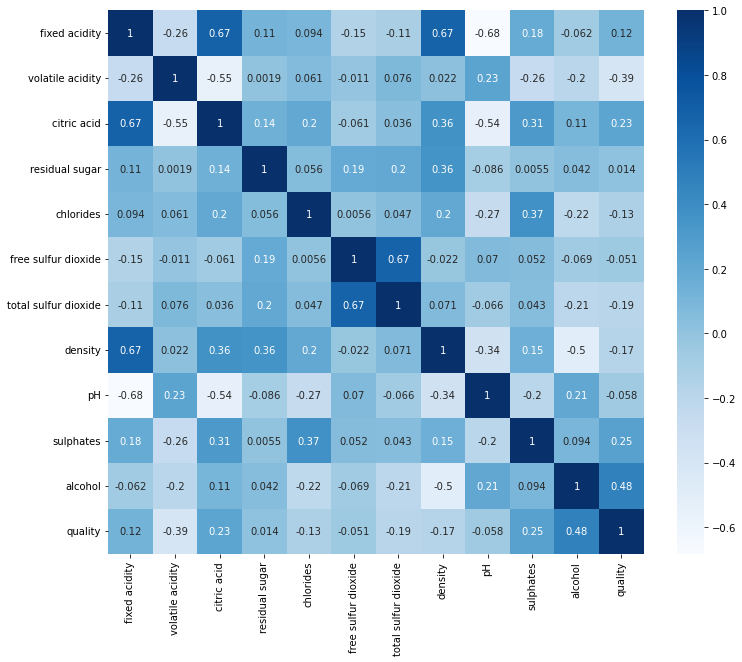

In [8]:
# Heat Map
plt.figure(figsize=(12,10))
cor = redwine.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

volatile acidity    0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

### Scatterplot
Quality = discrete variable

AxesSubplot(0.125,0.125;0.775x0.755)


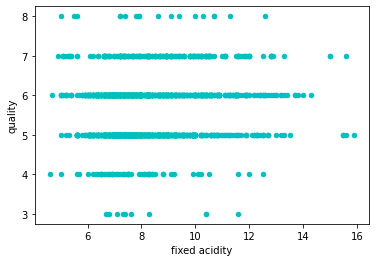

In [10]:
# fixed acidity
fixedacidity = redwine.plot(kind='scatter', x='fixed acidity', y='quality', color='c')    
print(fixedacidity)

AxesSubplot(0.125,0.125;0.775x0.755)


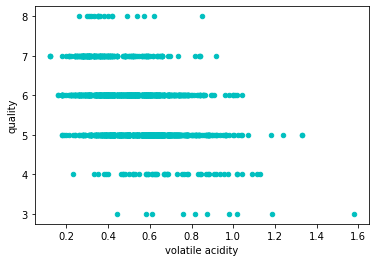

In [11]:
# volatile acidity
volatileacidity = redwine.plot(kind='scatter', x='volatile acidity', y='quality', color='c')      
print(volatileacidity)

AxesSubplot(0.125,0.125;0.775x0.755)


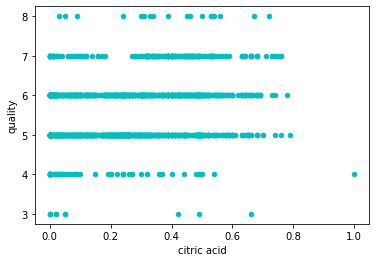

In [12]:
# citric acid
citricacid = redwine.plot(kind='scatter', x='citric acid', y='quality', color='c')      
print(citricacid)

AxesSubplot(0.125,0.125;0.775x0.755)


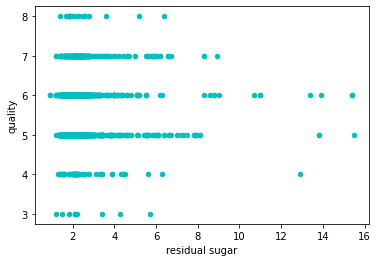

In [13]:
# residual sugar
residualsugar = redwine.plot(kind='scatter', x='residual sugar', y='quality', color='c')      
print(residualsugar)

AxesSubplot(0.125,0.125;0.775x0.755)


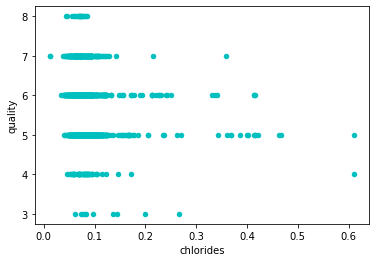

In [14]:
# chlorides
chlorides = redwine.plot(kind='scatter', x='chlorides', y='quality', color='c')      
print(chlorides)

AxesSubplot(0.125,0.125;0.775x0.755)


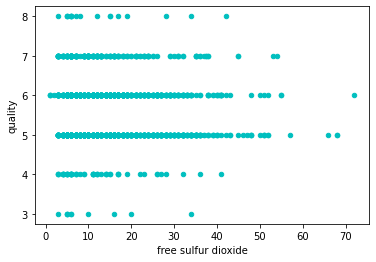

In [15]:
# free sulfur dioxide
freesulfurdioxide = redwine.plot(kind='scatter', x='free sulfur dioxide', y='quality', color='c')      
print(freesulfurdioxide)

AxesSubplot(0.125,0.125;0.775x0.755)


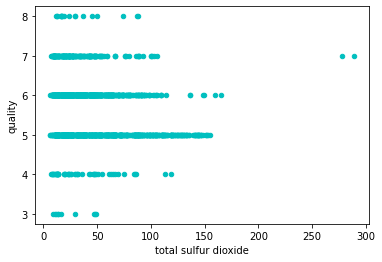

In [16]:
# total sulfur dioxide
totalsulfurdioxide = redwine.plot(kind='scatter', x='total sulfur dioxide', y='quality', color='c')      
print(totalsulfurdioxide)

AxesSubplot(0.125,0.125;0.775x0.755)


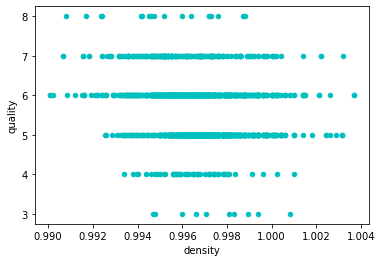

In [17]:
# density
density = redwine.plot(kind='scatter', x='density', y='quality', color='c')      
print(density)

AxesSubplot(0.125,0.125;0.775x0.755)


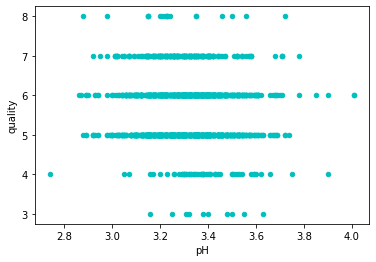

In [18]:
# pH
pH = redwine.plot(kind='scatter', x='pH', y='quality', color='c')      
print(pH)

AxesSubplot(0.125,0.125;0.775x0.755)


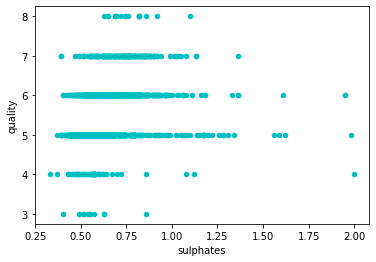

In [19]:
# sulphates
sulphates = redwine.plot(kind='scatter', x='sulphates', y='quality', color='c')      
print(sulphates)

## Default Task - Classification

In [20]:
# Select a logistic regression model
model = sklearn.linear_model.LogisticRegression()

In [21]:
x1 = redwine[['sulphates']]
y1 = redwine['quality']

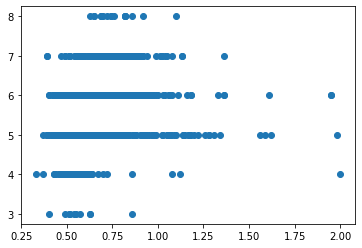

In [22]:
plt.scatter(x1,y1)

In [23]:
# Train, Test, Split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [24]:
# Train the model
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
x_train.shape

(1119, 1)

In [26]:
x_test.shape

(480, 1)

In [27]:
# Make a prediction
variable = [[1]]
model.predict(variable)

array([6])

notes:
precision on recall and confusion matrix

In [28]:
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=4)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

loss = cross_val_score(model1,
                       x_train,
                       y_train, 
                       cv=5, 
                       scoring='neg_mean_squared_error')
loss

array([-0.55395508, -0.64038086, -0.65429688, -0.56225586, -0.53480392])

In [29]:
np.mean(np.sqrt(-loss))

0.7669091792273802

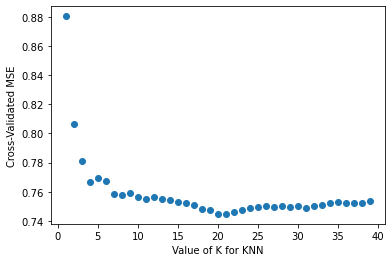

In [30]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_scores.append(np.mean(np.sqrt(-loss)))

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.scatter(k_range, k_scores)
plt.show()

In [31]:
def knntest(n=1):
    model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

    model1.fit(x_train,y_train)
    y_pred1 = model1.predict(x_test)

    print('MSE_knn = ', mean_squared_error(y_test, y_pred1))

In [32]:
knntest(n=20)

MSE_knn =  0.5455
